**Overview**

https://archive.ics.uci.edu/ml/datasets/Online+Retail Online Retail dataset is a transnational dataset containing all the transections occured between dates 01/02/2010 and 09/12/2011 for an UK-based and registered non-store online retail. The company sells unique all-ocassion gifts. Many customers of the company are wholesailers.

Here we need to figureout how many customer segments are there which can be usefull for the business.  

**Steps of execution:**

1. Reading and understand the data
2. Clean the data
3. Prepare the data for modeling (scaling)
4. Modeling
5. Final analysis and business recomendation

## **1. Reading and understand the data**

In [1]:
from google.colab import files
files.upload()

Saving Online+Retail.csv to Online+Retail.csv


In [48]:
!ls

Online+Retail.csv  sample_data


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [51]:
retail_df = pd.read_csv('Online+Retail.csv', encoding ='ISO-8859-1', sep = ',', header = 0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [52]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [53]:
# checking for missing values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [54]:
print(retail_df.shape)
print(len(retail_df))

(541909, 8)
541909


In [55]:
# percentage of missing values
round(((retail_df.isnull().sum())/len(retail_df)*100), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

## **2. Cleaning the data**

In [56]:
# Dropping all rows with missing values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [57]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## **3. Preparing the data for modeling**

creating the following columns

- R (Recency) : Number of days since last purchase
- F (Frequency) : Number of transactions
- M (Monetary)  : Total amount fo transaction (revenue contributed)


In [58]:
# Creating a new column called amount for creating Monetary column

retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [59]:
# monitary (creating amount column)
monitary_df = retail_df.groupby('CustomerID')['amount'].sum()
monitary_df = monitary_df.reset_index()
monitary_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [60]:
# Creating the 2nd derived metric 'Frequency'
frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency_df = frequency_df.reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [61]:
grouped_df = pd.merge(monitary_df, frequency_df, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [62]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [63]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [64]:
# convering InvoiceDate to date-time format
retail_df.InvoiceDate = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [65]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [66]:
# checking the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [67]:
# Calculating the time difference of last transction
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [68]:
# Finaly calculating the final derived metric 'recency'
recency_df = retail_df.groupby('CustomerID')['diff'].min()
recency_df = recency_df.reset_index()
recency_df.columns = ['CustomerID', 'Last purchase']
recency_df.head()

,CustomerID,Last purchase
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [69]:
# Merging to the grouped dataframe
grouped_df = pd.merge(grouped_df, recency_df, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,Frequency,Last purchase
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [70]:
# Extracting number of days from recency column
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   CustomerID     4372 non-null   float64        
 1   amount         4372 non-null   float64        
 2   Frequency      4372 non-null   int64          
 3   Last purchase  4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


In [71]:

# Extracting only number of days from the last purchased column

grouped_df['Last purchase'] = grouped_df['Last purchase'].apply(lambda x: x.days)
grouped_df.head()

,CustomerID,amount,Frequency,Last purchase
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


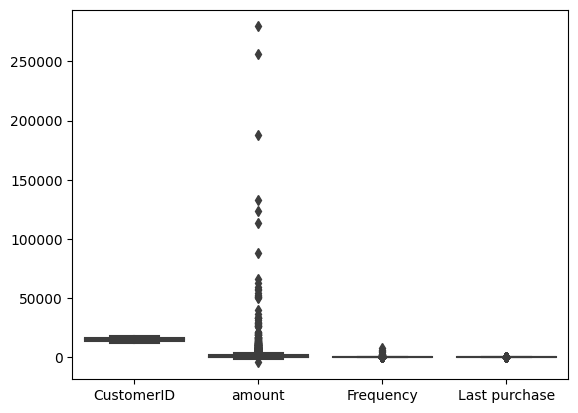

In [72]:
# outlier treatment
sns.boxplot(grouped_df)
plt.show()

In [73]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4372 non-null   float64
 1   amount         4372 non-null   float64
 2   Frequency      4372 non-null   int64  
 3   Last purchase  4372 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 170.8 KB


In [74]:
# removing outliers from [monitory] column
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# removing outliers from [frequency] column
Q1 = grouped_df.Frequency.quantile(0.05)
Q3 = grouped_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Frequency >= Q1 - 1.5*IQR) & (grouped_df.Frequency <= Q3 + 1.5*IQR)]

# removing outliers from [recency] column
Q1 = grouped_df['Last purchase'].quantile(0.05)
Q3 = grouped_df['Last purchase'].quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df['Last purchase'] >= Q1 - 1.5*IQR) & (grouped_df['Last purchase'] <= Q3 + 1.5*IQR)]

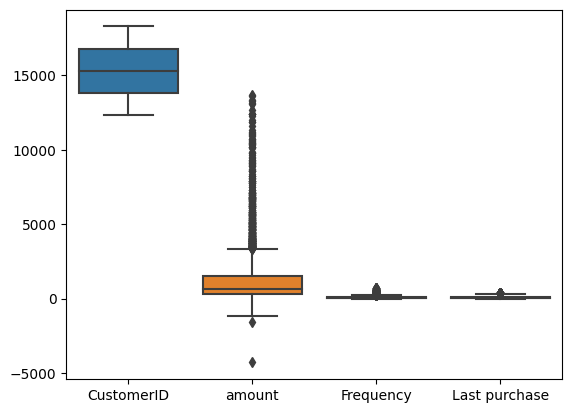

In [75]:
sns.boxplot(grouped_df)
plt.show()

In [76]:
# RFM data
rfm_df = grouped_df[['amount', 'Frequency', 'Last purchase']]
rfm_df.head()

,amount,Frequency,Last purchase
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [79]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [80]:
# Calculating the Hopkins statistics 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [81]:
print(hopkins(rfm_df_scaled))

0.9510857898603229


# **Using K-means clusturing method**

## **4. Modeling**

In [82]:
from sklearn.cluster import KMeans

In [83]:
kmeans = KMeans(n_clusters = 4, max_iter = 50, n_init='auto')
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, n_init='auto')

In [84]:
len(kmeans.labels_)

4293

In [85]:
kmeans.labels_

array([3, 1, 0, ..., 3, 0, 0], dtype=int32)

### checking for optimal number of clusters

In [86]:
# using elbo-curve technique / Sum of squared distance
ssd = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for clusters in n_clusters:
  kmeans = KMeans(n_clusters = clusters, max_iter = 50, n_init='auto')
  kmeans.fit(rfm_df_scaled)

  ssd.append(kmeans.inertia_)

ssd

[7661.701161911676,
 4433.747689347625,
 3360.71910257702,
 2804.119646017235,
 2450.4875987573823,
 2038.997269011476,
 1829.4060601437372]

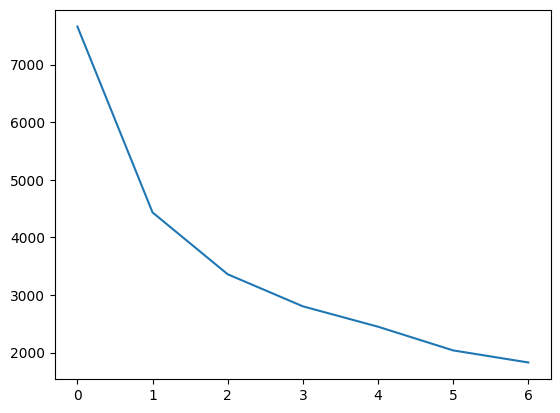

In [87]:
plt.plot(ssd)
plt.show()

In the above plot x-axis [0:2, 1:3, 3:4, .......] 
here moving further from point 3 (which represents 4 clusters) does not provide any significant decrease in ssd value. So 4 is our optimal number of clusters

In [88]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score

In [89]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for clusters in n_clusters:
  kmeans = KMeans(n_clusters = clusters, max_iter = 50, n_init='auto')
  kmeans.fit(rfm_df_scaled)

  silhoutte_avg = silhouette_score(rfm_df_scaled, kmeans.labels_)
  print("The silhoutte score for cluster{0} is {1}".format(clusters, silhoutte_avg))

The silhoutte score for cluster2 is 0.40187674222245956
The silhoutte score for cluster3 is 0.5084896296141937
The silhoutte score for cluster4 is 0.48506020563508856
The silhoutte score for cluster5 is 0.4638787576606892
The silhoutte score for cluster6 is 0.427878184172181
The silhoutte score for cluster7 is 0.41481670613813887
The silhoutte score for cluster8 is 0.33137822107195075


In [90]:
kmeans = KMeans(n_clusters = 3, max_iter = 50, n_init='auto')
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3, n_init='auto')

In [91]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [92]:
# Asigning the lebels to grouped df to analyse the clusters
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,Frequency,Last purchase,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


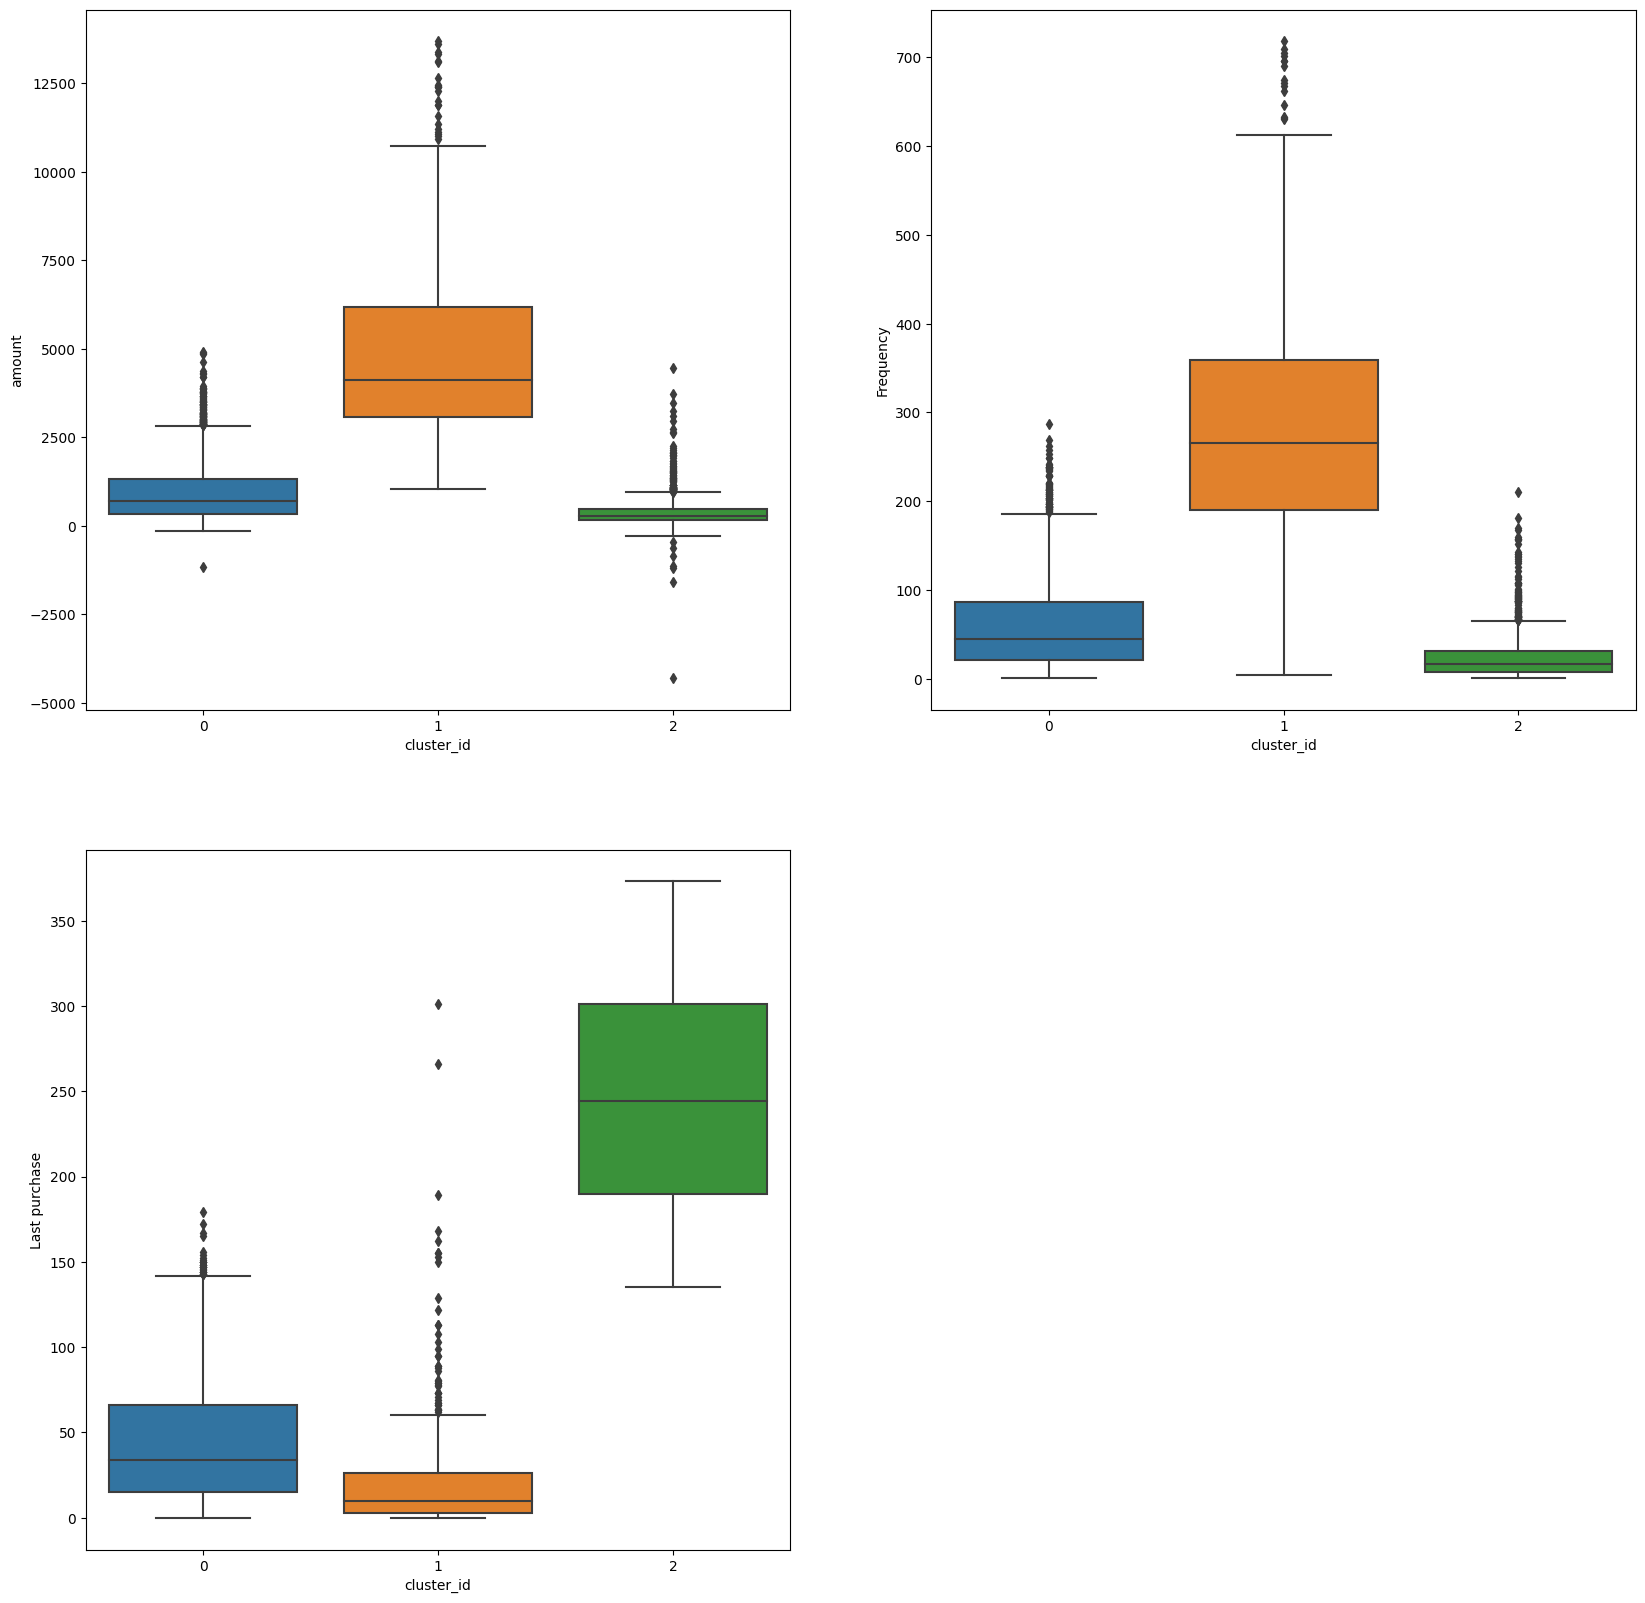

In [93]:
fig = plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='Frequency', data=grouped_df)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='Last purchase', data=grouped_df)
plt.show()

# **Using hierarchical Clustering method**

## **4. Modeling**

In [94]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [95]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
help(linkage)

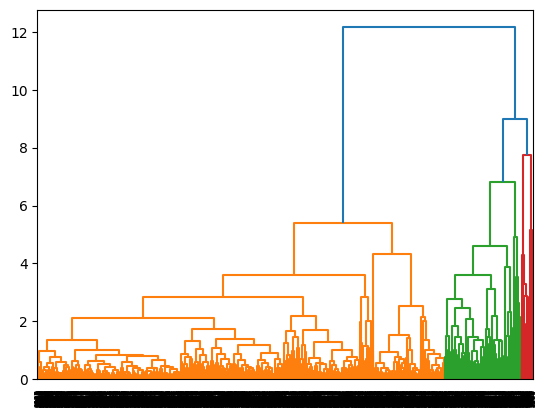

In [100]:
# single linkage
mergings = linkage(rfm_df_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

It is clearly visible from the above dendrogram that there are 3 distinct clusters.

In [102]:
mergings.shape

(4292, 4)

In [103]:
# Cutting the dendrogram and getting 3 clustures
clusters = cut_tree(mergings, n_clusters=3).reshape(-1,)
clusters

array([0, 1, 0, ..., 0, 0, 0])

In [105]:
# Adding new cluster lebels to previous data
grouped_df['cluster_label_HC'] = clusters
grouped_df.head()

,CustomerID,amount,Frequency,Last purchase,cluster_id,cluster_lebel_HC,cluster_label_HC
0,12346.0,0.00,2,325,2,0,0
1,12347.0,4310.00,182,1,1,1,1
2,12348.0,1797.24,31,74,0,0,0
3,12349.0,1757.55,73,18,0,0,0
4,12350.0,334.40,17,309,2,0,0


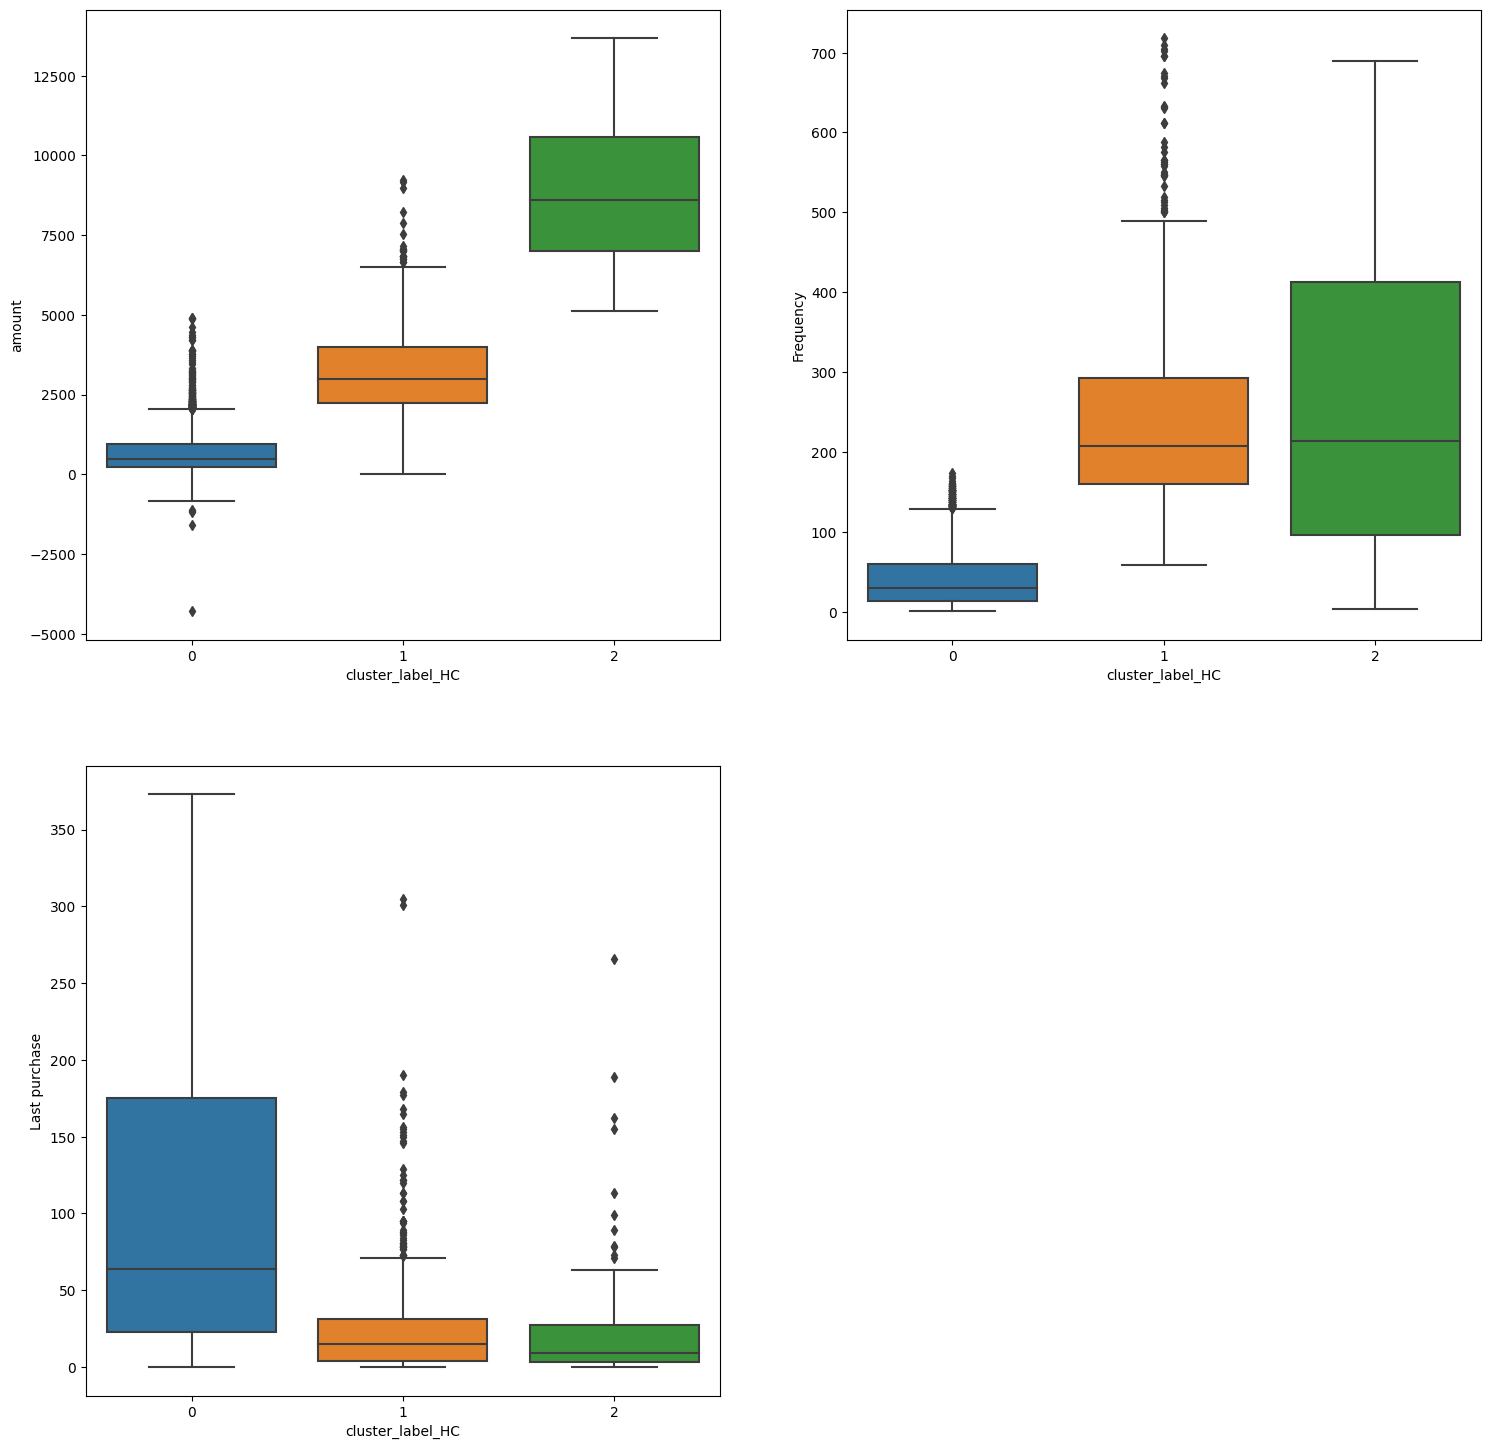

In [107]:
# Visualizing the newly formed clusters
fig = plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_label_HC', y='amount', data=grouped_df)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_label_HC', y='Frequency', data=grouped_df)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_label_HC', y='Last purchase', data=grouped_df)
plt.show()